<a href="https://colab.research.google.com/github/bhuppenthal/DataScienceLab/blob/main/workshop-content/uadl-cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision: Image Analysis

Images:
- ![clear apples](https://www.kew.org/sites/default/files/styles/social/public/2022-05/apple%20cultivars.png?h=1d19dfc9&itok=NT2TwltK)
- ![tagliere](https://media.post.rvohealth.io/wp-content/uploads/2020/09/health-benefits-of-apples-1200x628-facebook-1200x628.jpg)

In [ ]:
!wget -O apples.png https://www.kew.org/sites/default/files/styles/social/public/2022-05/apple%20cultivars.png?h=1d19dfc9&itok=NT2TwltK

--2023-11-19 00:20:58--  https://www.kew.org/sites/default/files/styles/social/public/2022-05/apple%20cultivars.png?h=1d19dfc9
Resolving www.kew.org (www.kew.org)... 34.248.65.209
Connecting to www.kew.org (www.kew.org)|34.248.65.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 817197 (798K) [image/png]
Saving to: ‘apples.png’

apples.png          100%[===================>] 798.04K  1.61MB/s    in 0.5s    

2023-11-19 00:20:59 (1.61 MB/s) - ‘apples.png’ saved [817197/817197]



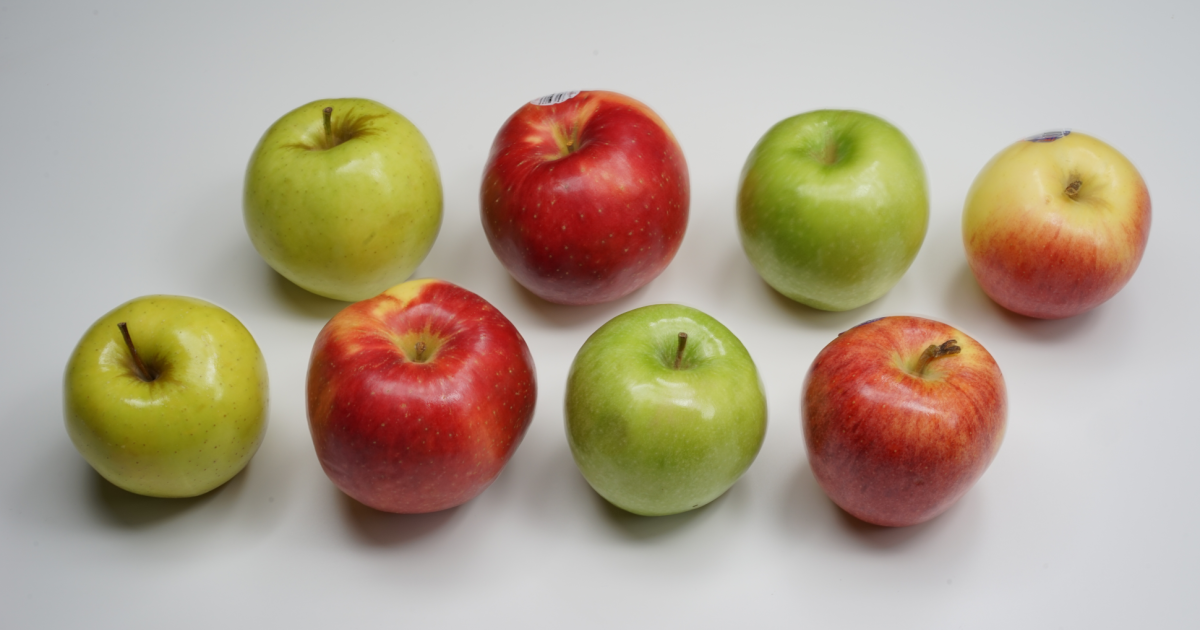

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image of apples
image = cv2.imread('apples.png')
cv2_imshow(image)

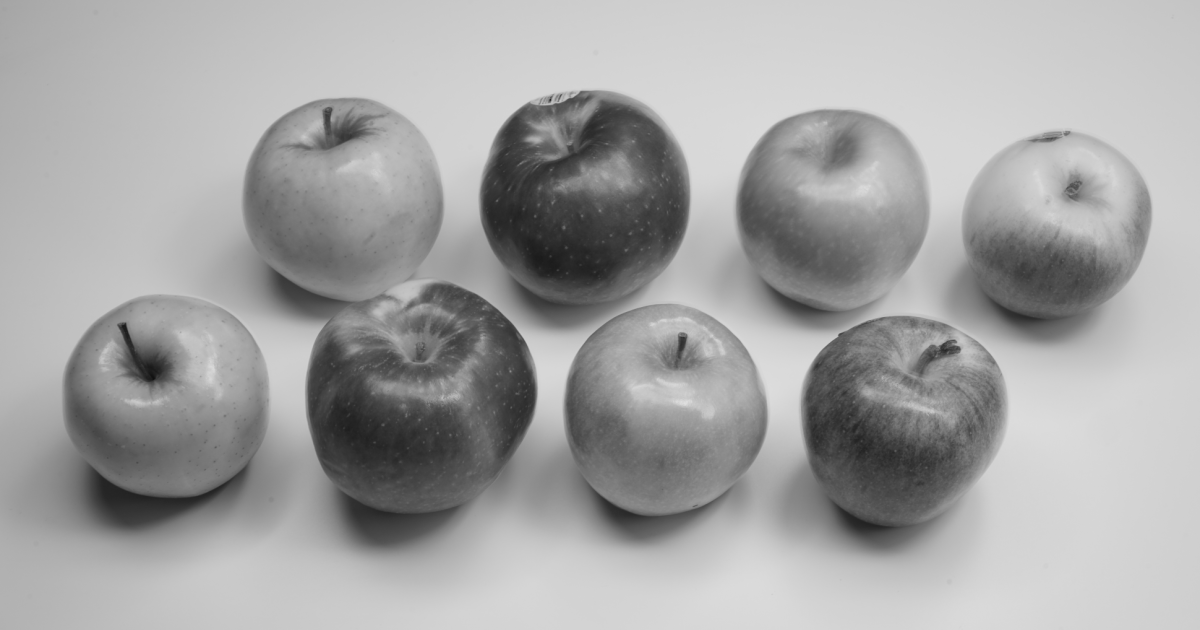

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

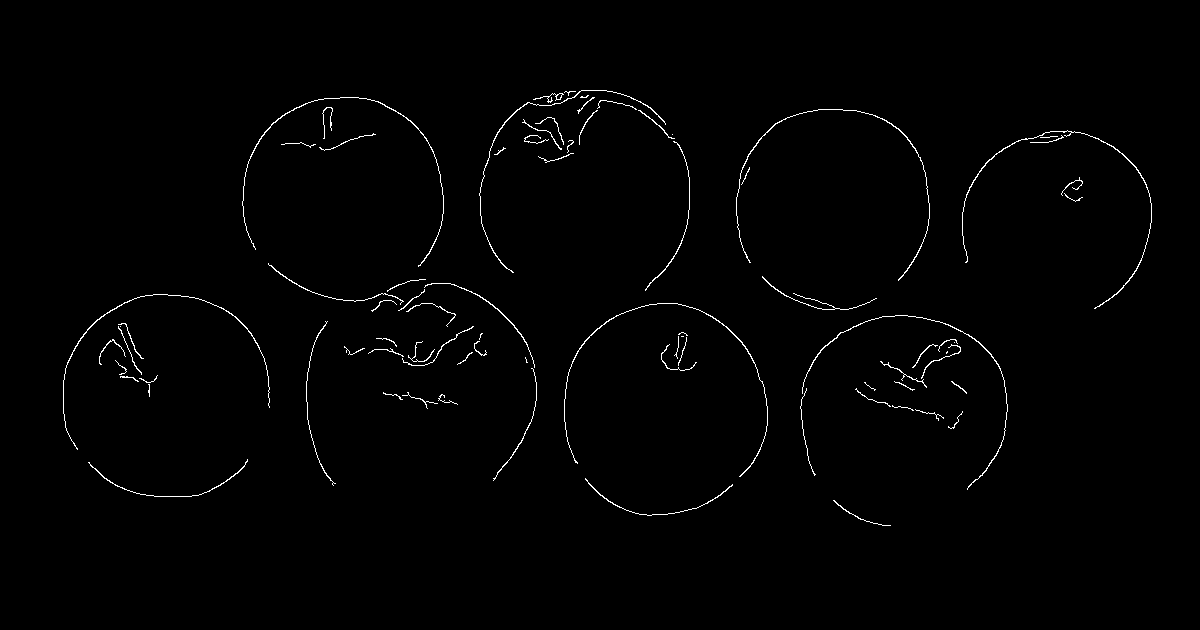

In [ ]:
# Apply Gaussian blur to reduce noise
sigmaX = 7
sigmaY = 7
blurred = cv2.GaussianBlur(gray, (sigmaX, sigmaY), 0)

# Perform edge detection
edges = cv2.Canny(blurred, 40, 100)
cv2_imshow(edges)

Number of apples: 8


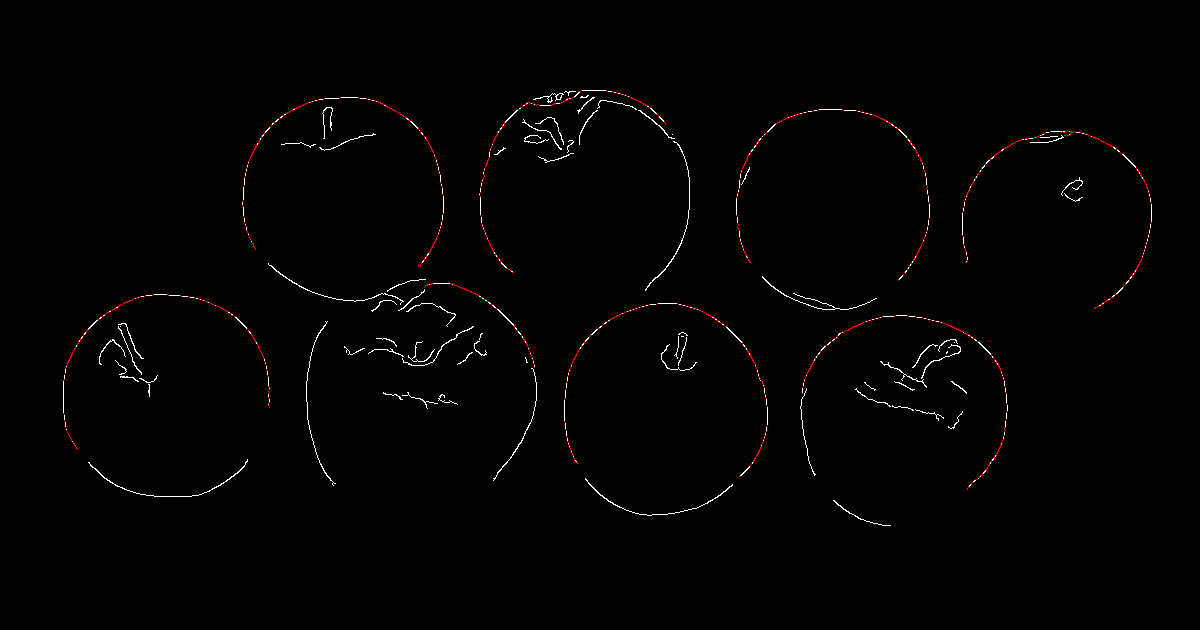

In [ ]:
# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a counter for the number of apples
apple_count = 0

# Iterate through the contours and filter out small ones (potential noise)
valid_contours = []
for contour in contours:
    if cv2.contourArea(contour) > 50:
        valid_contours.append(contour)
        apple_count += 1
valid_contours = np.asarray(valid_contours, dtype=object)

# Print the number of apples found
print(f"Number of apples: {apple_count}")

# Visualize the countours
show_contours = np.stack((edges, edges, edges), axis=-1)

for contour in valid_contours:
  for [point] in contour:
    show_contours[point[1], point[0], :] = [0, 0, 255]

cv2_imshow(show_contours)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([ 957.9153,  128.8438, 1151.0056,  320.4172])
tensor([ 799.4447,  311.3078, 1011.1110,  529.6797])
tensor([243.8196,  96.6777, 442.6930, 297.4209])
tensor([303.1214, 275.8398, 538.7452, 517.4175])
tensor([481.8899,  84.3908, 691.4740, 304.4131])
tensor([ 63.1834, 296.4458, 268.8495, 498.8481])
tensor([736.3442, 104.5663, 934.1531, 317.8021])
tensor([563.3602, 301.5422, 768.0839, 516.8333])
tensor([  27.4385,   20.1638, 1200.0000,  621.2598])


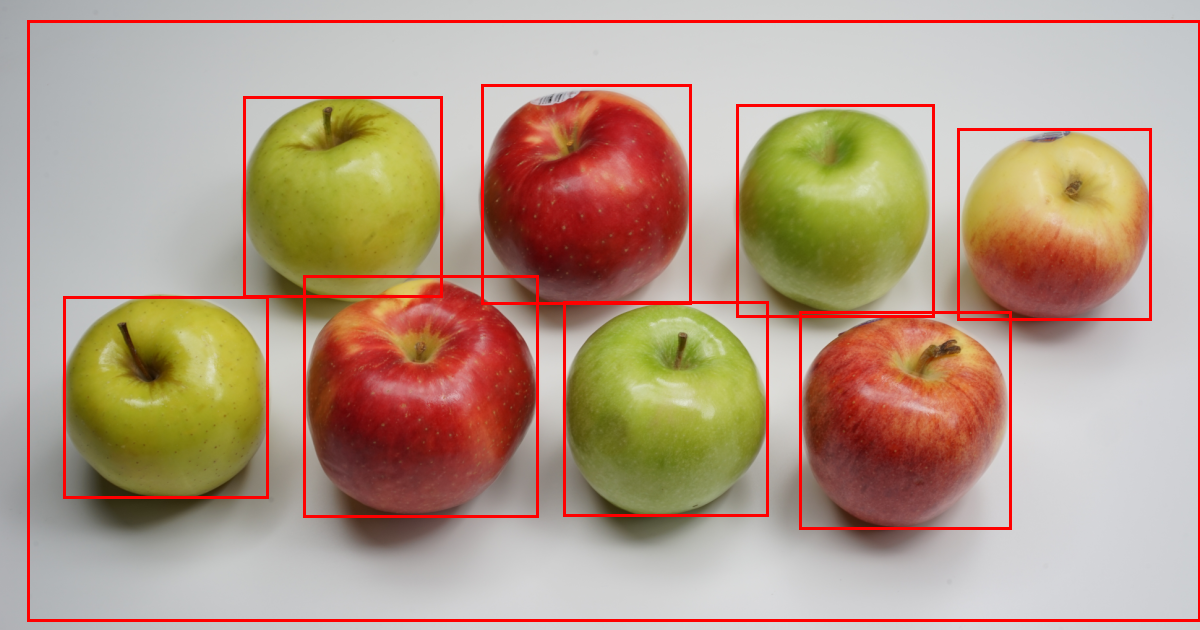

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw
import requests
from io import BytesIO

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Modify the transformation for input images
transform = transforms.Compose([
    transforms.ToTensor()
])

# Function to perform object detection on an image
def detect_objects(model, image, threshold=0.5):
    # Transform the input image
    input_image = transform(image).unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        prediction = model(input_image)

    # Filter out predictions below the threshold
    boxes = prediction[0]['boxes'][prediction[0]['scores'] > threshold]
    scores = prediction[0]['scores'][prediction[0]['scores'] > threshold]

    return boxes, scores

# Function to draw bounding boxes on the image
def draw_boxes(image, boxes, scores):
    draw = ImageDraw.Draw(image)
    for box in boxes:
        draw.rectangle(list(box), outline="red", width=3)
    return image

# Function to visualize the detection results
def visualize_results(image, boxes, scores):
    image_with_boxes = draw_boxes(image, boxes, scores)
    display(image_with_boxes)

# Example image path
image_path = "apples.png"

# Load image and perform object detection
image = Image.open(image_path).convert('RGB')

boxes, scores = detect_objects(model, image, threshold=0.5)

# Visualize the results
visualize_results(image, boxes, scores)